In [1]:
import pandas as pd

train_df = pd.read_csv("train.csv")
train_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [2]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (58592, 44)
Test shape: (39063, 43)


In [122]:
test_df  = pd.read_csv("test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [123]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  object 
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  object 
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  object 
 8   model                             39063 non-null  object 
 9   fuel_type                         39063 non-null  object 
 10  max_torque                        39063 non-null  object 
 11  max_power                         39063 non-null  object 
 12  engi

In [5]:
train_df['is_claim'].value_counts()
#class imblancing here

is_claim
0    54844
1     3748
Name: count, dtype: int64

In [6]:
set(train_df.columns) - set(test_df.columns)


{'is_claim'}

In [7]:
train_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [124]:
test_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [9]:
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)


Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


In [10]:
categorical_cols_test = test_df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols_test)

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


In [11]:
numerical_cols = train_df.select_dtypes(include=["int64","float64"]).columns
print(numerical_cols)

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')


# Data Handling

In [12]:
#dropping the police_id
train_df = train_df.drop(columns=['policy_id'])



In [14]:
train_df["area_cluster"].unique()

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22'], dtype=object)

In [125]:
test_df["area_cluster"].unique()

array(['C3', 'C8', 'C5', 'C16', 'C14', 'C11', 'C2', 'C1', 'C9', 'C15',
       'C10', 'C19', 'C13', 'C6', 'C4', 'C12', 'C18', 'C7', 'C22', 'C17',
       'C20', 'C21'], dtype=object)

In [16]:
# Doing here LabelEncoder , area_cluster is a nominal categorical variable

#No inherent ranking

from sklearn.preprocessing import LabelEncoder

le_area = LabelEncoder()
train_df['area_cluster_encoded'] = le_area.fit_transform(train_df['area_cluster'])
#droping original column
train_df = train_df.drop(columns=['area_cluster'])


In [126]:
# same we do for test.csv in ecery process

from sklearn.preprocessing import LabelEncoder

test_df['area_cluster_encoded'] = le_area.transform(test_df['area_cluster'])
#droping original column
test_df = test_df.drop(columns=['area_cluster'])

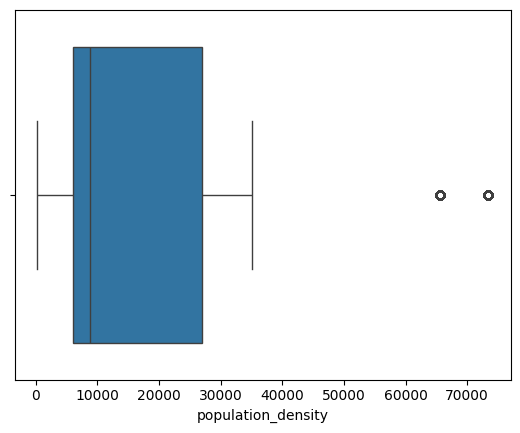

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['population_density'])  # no outliers detected here
plt.show()

In [19]:
train_df["make"].unique()

array([1, 2, 3, 4, 5])

In [20]:
test_df["make"].unique()

array([1, 2, 3, 4, 5])

In [21]:
train_df["segment"].unique()

array(['A', 'C1', 'C2', 'B2', 'B1', 'Utility'], dtype=object)

In [22]:
test_df["segment"].unique()

array(['A', 'B2', 'B1', 'C2', 'C1', 'Utility'], dtype=object)

In [23]:
# One Hot Encoding for segment

segment_dummies = pd.get_dummies(
    train_df['segment'],
    prefix='segment',
    drop_first=True
)

train_df = pd.concat([train_df, segment_dummies], axis=1)

# Dropping the column of segment

train_df = train_df.drop(columns=['segment'])


In [127]:
# One Hot Encoding for segment for test.csv


segment_dummies = pd.get_dummies(
    test_df['segment'],
    prefix='segment',
    drop_first=True
)

test_df = pd.concat([test_df, segment_dummies], axis=1)

# Dropping the column of segment

test_df = test_df.drop(columns=['segment'])

In [25]:
train_df["model"].unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'],
      dtype=object)

In [26]:
# doing here label encoding for model

from sklearn.preprocessing import LabelEncoder

le_model = LabelEncoder()
train_df['model_encoded'] = le_model.fit_transform(train_df['model'])

train_df=train_df.drop(columns=['model'])


In [128]:
# same we are doing for test.csv

from sklearn.preprocessing import LabelEncoder


test_df['model_encoded'] = le_model.transform(test_df['model'])

test_df=test_df.drop(columns=['model'])

In [28]:
train_df["fuel_type"].unique()

array(['CNG', 'Petrol', 'Diesel'], dtype=object)

In [129]:
test_df["fuel_type"].unique()

array(['CNG', 'Petrol', 'Diesel'], dtype=object)

In [30]:
# creating the dummies for fuel_type 

fuel_dummies = pd.get_dummies(
    train_df['fuel_type'],
    prefix='fuel',
    drop_first=True
)

train_df = pd.concat([train_df, fuel_dummies], axis=1)

#droping the column

train_df=train_df.drop(columns=['fuel_type'])


In [130]:
# same creating the dummies for fuel_type for test file

fuel_dummies = pd.get_dummies(
    test_df['fuel_type'],
    prefix='fuel',
    drop_first=True
)

test_df = pd.concat([test_df, fuel_dummies], axis=1)

#droping the column

test_df=test_df.drop(columns=['fuel_type'])

In [32]:
# Splitting the max_torque into max_torque_value and max_torque_rpm

import pandas as pd

# Function to split
def split_torque(x):
    if pd.isnull(x):
        return pd.Series([None, None])
    value, rpm = x.split('@')
    value = float(value.replace('Nm','').strip())
    rpm = float(rpm.replace('rpm','').strip())
    return pd.Series([value, rpm])

train_df[['max_torque_value', 'max_torque_rpm']] = train_df['max_torque'].apply(split_torque)


In [131]:

test_df[['max_torque_value', 'max_torque_rpm']] = test_df['max_torque'].apply(split_torque)

In [34]:
# splitting the max_power into max_power_value and max_power_rpm

# Function to split
def split_torquee(x):
    if pd.isnull(x):
        return pd.Series([None, None])
    value, rpm = x.split('@')
    value = float(value.replace('bhp','').strip())
    rpm = float(rpm.replace('rpm','').strip())
    return pd.Series([value, rpm])

train_df[["max_power_value","max_power_rpm"]] = train_df["max_power"].apply(split_torquee)

In [132]:
test_df[["max_power_value","max_power_rpm"]] = test_df["max_power"].apply(split_torquee)

In [36]:
#droping that max_power and max_torque

train_df= train_df.drop(columns=["max_power","max_torque"])

In [133]:
#droping that max_power and max_torque also in the test.csv

test_df= test_df.drop(columns=["max_power","max_torque"])

In [38]:
train_df["engine_type"].unique()

array(['F8D Petrol Engine', '1.2 L K12N Dualjet', '1.0 SCe',
       '1.5 L U2 CRDi', '1.5 Turbocharged Revotorq', 'K Series Dual jet',
       '1.2 L K Series Engine', 'K10C', 'i-DTEC', 'G12B',
       '1.5 Turbocharged Revotron'], dtype=object)

In [39]:
# doing one hot encoder for Engine_type

from sklearn.preprocessing import OneHotEncoder

ohe_engine = OneHotEncoder(
    drop='first',              # avoid dummy variable trap
    sparse_output=False,       # get numpy array (sklearn >=1.2)
    handle_unknown='ignore'
)


In [40]:
engine_ohe = ohe_engine.fit_transform(train_df[['engine_type']])


In [134]:
# also doing for test
engine_ohe_test = ohe_engine.transform(test_df[['engine_type']])


In [42]:
engine_ohe_df = pd.DataFrame(
    engine_ohe,
    columns=ohe_engine.get_feature_names_out(['engine_type']),
    index=train_df.index
)


In [135]:
# for test_df
engine_ohe_df_test = pd.DataFrame(
    engine_ohe_test,
    columns=ohe_engine.get_feature_names_out(['engine_type']),
    index=test_df.index
)

In [44]:
train_df = pd.concat([train_df, engine_ohe_df], axis=1)
#droping the engine_type
train_df=train_df.drop(columns=['engine_type'])


In [136]:
test_df = pd.concat([test_df, engine_ohe_df_test], axis=1)
#droping the engine_type
test_df=test_df.drop(columns=['engine_type'])

In [46]:
#Mpping al  yes/no column to 0 and 1
train_df["airbags"].unique()

array([2, 6, 1])

In [47]:
train_df["is_esc"].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
test_df["is_esc"].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
train_df['is_esc'] = train_df['is_esc'].map({'No': 0, 'Yes': 1})


In [137]:
test_df['is_esc'] = test_df['is_esc'].map({'No': 0, 'Yes': 1})

In [51]:

train_df["is_tpms"].unique()

array(['No', 'Yes'], dtype=object)

In [52]:
train_df['is_tpms'] = train_df['is_tpms'].map({'No': 0, 'Yes': 1})

In [53]:
test_df["is_tpms"].unique()

array(['No', 'Yes'], dtype=object)

In [138]:
test_df['is_tpms'] = test_df['is_tpms'].map({'No': 0, 'Yes': 1})

In [55]:
train_df["is_parking_camera"].unique()

array(['No', 'Yes'], dtype=object)

In [56]:
test_df["is_parking_camera"].unique()

array(['No', 'Yes'], dtype=object)

In [57]:
train_df['is_parking_camera'] = train_df['is_parking_camera'].map({'No': 0, 'Yes': 1})

In [139]:
test_df['is_parking_camera'] = test_df['is_parking_camera'].map({'No': 0, 'Yes': 1})

In [59]:
train_df["is_parking_sensors"].unique()

array(['Yes', 'No'], dtype=object)

In [60]:
train_df['is_parking_sensors'] = train_df['is_parking_sensors'].map({'No': 0, 'Yes': 1})

In [140]:
test_df['is_parking_sensors'] = test_df['is_parking_sensors'].map({'No': 0, 'Yes': 1})

In [62]:
train_df["is_adjustable_steering"].unique()

array(['No', 'Yes'], dtype=object)

In [63]:
train_df['is_adjustable_steering'] = train_df['is_adjustable_steering'].map({'No': 0, 'Yes': 1})

In [141]:
test_df['is_adjustable_steering'] = test_df['is_adjustable_steering'].map({'No': 0, 'Yes': 1})

In [65]:
train_df["rear_brakes_type"].unique()

array(['Drum', 'Disc'], dtype=object)

In [66]:
train_df['rear_brakes_type'] = train_df['rear_brakes_type'].map({
    'Drum': 0,
    'Disc': 1
})


In [142]:
test_df['rear_brakes_type'] = test_df['rear_brakes_type'].map({
    'Drum': 0,
    'Disc': 1
})

In [68]:
train_df["transmission_type"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [69]:
train_df['transmission_type'] = train_df['transmission_type'].map({
    'Manual': 0,
    'Automatic': 1
})


In [144]:
test_df['transmission_type'] = test_df['transmission_type'].map({
    'Manual': 0,
    'Automatic': 1
})

In [71]:
train_df['gear_box'].unique()


array([5, 6])

In [72]:
test_df["gear_box"].unique()

array([5, 6])

In [73]:
train_df["steering_type"].unique()

array(['Power', 'Electric', 'Manual'], dtype=object)

In [74]:
#  turning_radius                    58592 non-null  float64
#   length                            58592 non-null  int64  
#   width                             58592 non-null  int64  
#    height                            58592 non-null  int64  
 # gross_weight 
 #these all cases are numeric...we will do later in the form of standard scaler
 

In [75]:
print(train_df["is_front_fog_lights"].unique())
print(train_df["is_rear_window_wiper"].unique())
print(train_df["is_rear_window_washer"].unique())
print(train_df["is_rear_window_defogger"].unique())
print(train_df["is_brake_assist"].unique())
print(train_df["is_power_door_locks"].unique())
print(train_df["is_central_locking"].unique())
print(train_df["is_power_steering"].unique())
print(train_df["is_driver_seat_height_adjustable"].unique())
print(train_df["is_day_night_rear_view_mirror"].unique())
print(train_df["is_ecw"].unique())
print(train_df["is_speed_alert"].unique())

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']


In [76]:
bool_cols = [
    'is_front_fog_lights',
    'is_rear_window_wiper',
    'is_rear_window_washer',
    'is_rear_window_defogger',
    'is_brake_assist',
    'is_power_door_locks',
    'is_central_locking',
    'is_power_steering',
    'is_driver_seat_height_adjustable',
    'is_day_night_rear_view_mirror',
    'is_ecw',
    'is_speed_alert'
]
yes_no_map = {'No': 0, 'Yes': 1}

train_df[bool_cols] = train_df[bool_cols].replace(yes_no_map)


C:\Users\offic\AppData\Local\Temp\ipykernel_18872\3899583266.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[bool_cols] = train_df[bool_cols].replace(yes_no_map)


In [145]:
# same doing for the test_df

bool_cols = [
    'is_front_fog_lights',
    'is_rear_window_wiper',
    'is_rear_window_washer',
    'is_rear_window_defogger',
    'is_brake_assist',
    'is_power_door_locks',
    'is_central_locking',
    'is_power_steering',
    'is_driver_seat_height_adjustable',
    'is_day_night_rear_view_mirror',
    'is_ecw',
    'is_speed_alert'
]
yes_no_map = {'No': 0, 'Yes': 1}

test_df[bool_cols] = test_df[bool_cols].replace(yes_no_map)


C:\Users\offic\AppData\Local\Temp\ipykernel_18872\823069867.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[bool_cols] = test_df[bool_cols].replace(yes_no_map)


In [78]:
train_df["steering_type"].unique()

array(['Power', 'Electric', 'Manual'], dtype=object)

In [79]:
from sklearn.preprocessing import OneHotEncoder

ohe_steering = OneHotEncoder(
    drop='first',
    sparse_output=False,
    handle_unknown='ignore'
)

steering_ohe = ohe_steering.fit_transform(train_df[['steering_type']])

steering_ohe_df = pd.DataFrame(
    steering_ohe,
    columns=ohe_steering.get_feature_names_out(['steering_type']),
    index=train_df.index
)

train_df = pd.concat([train_df, steering_ohe_df], axis=1)
train_df=train_df.drop(columns=['steering_type'])


In [146]:


steering_ohe_test = ohe_steering.transform(test_df[['steering_type']])

steering_ohe_df_test = pd.DataFrame(
    steering_ohe_test,
    columns=ohe_steering.get_feature_names_out(['steering_type']),
    index=test_df.index
)

test_df = pd.concat([test_df, steering_ohe_df_test], axis=1)
test_df =test_df.drop(columns=['steering_type'])

In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          58592 non-null  float64
 1   age_of_car                             58592 non-null  float64
 2   age_of_policyholder                    58592 non-null  float64
 3   population_density                     58592 non-null  int64  
 4   make                                   58592 non-null  int64  
 5   airbags                                58592 non-null  int64  
 6   is_esc                                 58592 non-null  int64  
 7   is_adjustable_steering                 58592 non-null  int64  
 8   is_tpms                                58592 non-null  int64  
 9   is_parking_sensors                     58592 non-null  int64  
 10  is_parking_camera                      58592 non-null  int64  
 11  re

In [82]:
#converting all bool columns into int

bool_cols = train_df.select_dtypes(include='bool').columns
train_df[bool_cols] = train_df[bool_cols].astype(int)


In [147]:
#converting all bool columns into int same for test_df

bool_cols = test_df.select_dtypes(include='bool').columns
test_df[bool_cols] = test_df[bool_cols].astype(int)

In [149]:
test_policy_ids=test_df["policy_id"]

In [150]:
test_df=test_df.drop(columns="policy_id")

In [151]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          39063 non-null  float64
 1   age_of_car                             39063 non-null  float64
 2   age_of_policyholder                    39063 non-null  float64
 3   population_density                     39063 non-null  int64  
 4   make                                   39063 non-null  int64  
 5   airbags                                39063 non-null  int64  
 6   is_esc                                 39063 non-null  int64  
 7   is_adjustable_steering                 39063 non-null  int64  
 8   is_tpms                                39063 non-null  int64  
 9   is_parking_sensors                     39063 non-null  int64  
 10  is_parking_camera                      39063 non-null  int64  
 11  re

In [85]:
train_df["is_claim"].value_counts()

is_claim
0    54844
1     3748
Name: count, dtype: int64

In [86]:
#Starting The Train Process
#intializing the X and Y


X = train_df.drop(columns=['is_claim'])
y = train_df['is_claim']


In [87]:
#Train_Test_Split

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


## Logisic Resgression

In [88]:
#Logistic Regression model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)


In [89]:
! pip install imbalanced-learn

In [90]:
#not toching the val set...only smote the train set
# adding here similar type of data using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [91]:
# doing standardization for faster performance

from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
#standadize the x_train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# standadize the x_train
X_val[num_cols] = scaler.transform(X_val[num_cols])


In [92]:
#training the model

model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [93]:
#predictions

y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]


In [94]:
#Model Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_proba))

print(confusion_matrix(y_val, y_pred))



Accuracy: 0.5794009727792474
Precision: 0.08134642356241234
Recall: 0.5413333333333333
F1: 0.14143877373279917
ROC-AUC: 0.5875220469808855
[[6384 4585]
 [ 344  406]]


## Decision Tree

In [95]:
#Training the Decision tree

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [96]:
dt_pred=dt.predict(X_val)


In [97]:
#Model Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

print("Accuracy:", accuracy_score(y_val, dt_pred))
print("Precision:", precision_score(y_val, dt_pred))
print("Recall:", recall_score(y_val, dt_pred))
print("F1:", f1_score(y_val, dt_pred))

print(confusion_matrix(y_val, dt_pred))


Accuracy: 0.8609096339278095
Precision: 0.0963302752293578
Recall: 0.14
F1: 0.11413043478260869
[[9984  985]
 [ 645  105]]


In [98]:
dt_pred_train=dt.predict(X_train)

In [99]:
print("Accuracy:", accuracy_score(y_train, dt_pred_train))


Accuracy: 1.0


In [100]:
# here see the the difrence accuracy between train dataset and val data set......so later we control the tree by using gridsearch cv

# Advanced Modeling

## Random forest

In [101]:
# using the cross validation to boust the performance
#because of the class imbalance  we usee Stratified K-Fold

from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [102]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=50,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_auc = cross_val_score(
    rf, X_train, y_train,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1
)

print("RF CV ROC-AUC:", rf_auc.mean())



RF CV ROC-AUC: 0.8221991743573511


In [103]:
rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,12
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [104]:
# prediction
y_pred_rf = rf.predict(X_val)
y_proba_rf = rf.predict_proba(X_val)[:, 1]

In [105]:
#Model Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Precision:", precision_score(y_val, y_pred_rf))
print("Recall:", recall_score(y_val, y_pred_rf))
print("F1:", f1_score(y_val, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_val, y_proba_rf))


print(confusion_matrix(y_val, y_pred_rf))


Accuracy: 0.6448502431948119
Precision: 0.09707132735002362
Recall: 0.548
F1: 0.16492776886035312
ROC-AUC: 0.6355241741878628
[[7146 3823]
 [ 339  411]]


In [106]:
#Feature importance
import pandas as pd

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance.head(10)


,feature,importance
1,age_of_car,0.364225
0,policy_tenure,0.259832
2,age_of_policyholder,0.144967
3,population_density,0.056253
34,area_cluster_encoded,0.054534
43,max_torque_value,0.008107
17,length,0.008021
45,max_power_value,0.007732
19,height,0.007597
18,width,0.006227


## XGBoost

In [107]:
from xgboost import XGBClassifier

neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    random_state=42,
    n_jobs=-1
)
#cross validation
xgb_auc = cross_val_score(
    xgb, X_train, y_train,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1
)

print("XGBoost CV ROC-AUC:", xgb_auc.mean())


XGBoost CV ROC-AUC: 0.9683387219259583


In [108]:
xgb.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [109]:
# prediction
y_pred_xgb = xgb.predict(X_val)
y_proba_xgb = xgb.predict_proba(X_val)[:, 1]

In [110]:
#Model Evaluation

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)

print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Precision:", precision_score(y_val, y_pred_xgb))
print("Recall:", recall_score(y_val, y_pred_xgb))
print("F1:", f1_score(y_val, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_val, y_proba_xgb))


print(confusion_matrix(y_val, y_pred_xgb))


Accuracy: 0.922348323235771
Precision: 0.13302752293577982
Recall: 0.03866666666666667
F1: 0.05991735537190083
ROC-AUC: 0.6420037074178746
[[10780   189]
 [  721    29]]


In [111]:
import pandas as pd

xgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb.feature_importances_
}).sort_values(by='importance', ascending=False)

xgb_importance.head(10)


,feature,importance
1,age_of_car,0.198366
52,engine_type_F8D Petrol Engine,0.138492
2,age_of_policyholder,0.066629
12,displacement,0.063848
43,max_torque_value,0.058982
17,length,0.048796
0,policy_tenure,0.028877
13,cylinder,0.015475
41,fuel_Diesel,0.013993
20,gross_weight,0.013116


In [112]:
! pip install lightgbm

## LightGBM

In [161]:


from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=500,
    max_depth=-1,
    learning_rate=0.05,
    num_leaves=31,
    class_weight='balanced',
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgbm_auc = cross_val_score(
    lgbm, X_train, y_train,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1
)

print("LightGBM CV ROC-AUC:", lgbm_auc.mean())


LightGBM CV ROC-AUC: 0.9769783154357514


## Hyperparameter Tuning & Feature Engineering-

In [113]:
# building a pipeline with randomforest

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ('model', RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_split=100,
        min_samples_leaf=50,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])


In [114]:
# train test split_
rf_pipeline.fit(X_train, y_train)


,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_estimators,300
,criterion,'gini'
,max_depth,10
,min_samples_split,100
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'


In [115]:
from sklearn.metrics import roc_auc_score, classification_report

y_val_prob = rf_pipeline.predict_proba(X_val)[:, 1]
y_val_pred = (y_val_prob >= 0.3).astype(int)

print("ROC-AUC:", roc_auc_score(y_val, y_val_prob))
print(classification_report(y_val, y_val_pred))


ROC-AUC: 0.635189534141672
              precision    recall  f1-score   support

           0       0.97      0.14      0.24     10969
           1       0.07      0.94      0.13       750

    accuracy                           0.19     11719
   macro avg       0.52      0.54      0.18     11719
weighted avg       0.91      0.19      0.23     11719



In [116]:
# cross validation
from sklearn.model_selection import cross_val_score

cv_auc = cross_val_score(
    rf_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

print("Pipeline CV ROC-AUC:", cv_auc.mean())


Pipeline CV ROC-AUC: 0.7777247989870213


In [117]:
# hyperparameter tuning

param_grid = {
    'model__n_estimators': [300, 500],
    'model__max_depth': [6, 8, 10],
    'model__min_samples_leaf': [50, 100],
    'model__max_features': ['sqrt', 'log2']
}


In [118]:
from sklearn.model_selection import RandomizedSearchCV

rf_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_grid,
    n_iter=15,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rf_search.fit(X_train, y_train)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'model__max_depth': [6, 8, ...], 'model__max_features': ['sqrt', 'log2'], 'model__min_samples_leaf': [50, 100], 'model__n_estimators': [300, 500]}"
,n_iter,15
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [119]:
best_model = rf_search.best_estimator_

In [120]:
# tarin on full train.csv

X_full = pd.concat([X_train, X_val])
y_full = pd.concat([y_train, y_val])

best_model.fit(X_full, y_full)


,steps,"[('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_estimators,300
,criterion,'gini'
,max_depth,10
,min_samples_split,100
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'


In [121]:
# now predicting with test.csv

test_prob = best_model.predict_proba(test_df)[:, 1]
test_pred = (test_prob >= 0.3).astype(int)


In [152]:
submission = pd.DataFrame({
    'policy_id': test_policy_ids,   # saved earlier before drop
    'is_claim': test_pred
})

submission.head()


,policy_id,is_claim
0,ID58593,1
1,ID58594,1
2,ID58595,1
3,ID58596,1
4,ID58597,1


In [153]:
# saving the output

submission.to_csv("insurance_claim_predictions.csv", index=False)


In [154]:
submission['is_claim'].value_counts(normalize=True)


is_claim
1    1.0
Name: proportion, dtype: float64

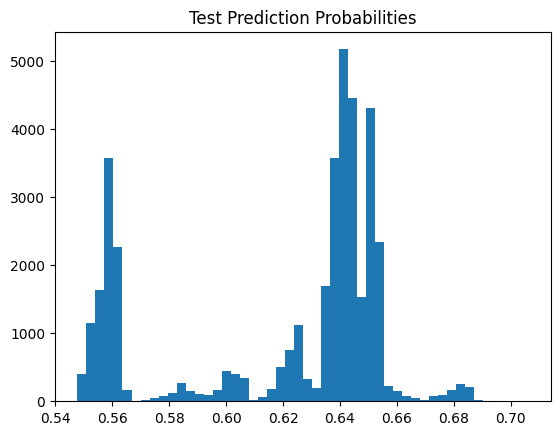

In [156]:
import matplotlib.pyplot as plt

plt.hist(test_prob, bins=50)
plt.title("Test Prediction Probabilities")
plt.show()


In [157]:
for t in [0.3, 0.4, 0.5, 0.6, 0.7]:
    preds = (test_prob >= t).astype(int)
    print(t, preds.mean())


0.3 1.0
0.4 1.0
0.5 1.0
0.6 0.7322530271612523
0.7 0.00017919770626935975
